In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
df = pd.read_csv('student_scores - student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


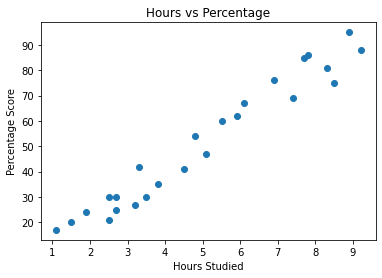

In [30]:
plt.scatter(x=df['Hours'], y=df['Scores'])  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

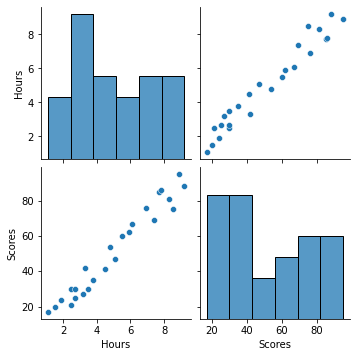

In [5]:
sns.pairplot(df)

<AxesSubplot:>

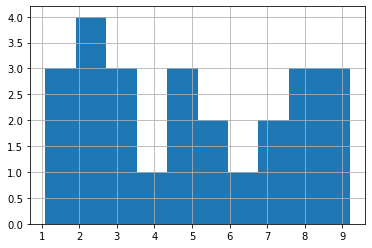

In [6]:
df['Hours'].hist()

<AxesSubplot:>

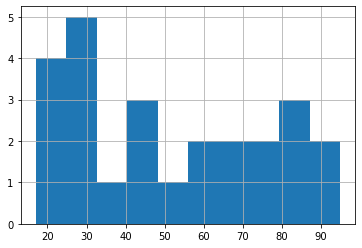

In [7]:
df['Scores'].hist()

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [9]:
X = df.drop('Scores', axis=1).values
y = df['Scores'].values

In [10]:
reg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.3, random_state=42)
reg.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = reg.predict(X_test)

In [12]:
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
#prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)

R^2: 0.9487647340257012
Root Mean Squared Error: 4.859985351228103


In [13]:
for i in range(len(y_test)):
    print(y_test[i]," __ ", int(y_pred[i]) )

81  __  83
30  __  27
21  __  27
76  __  69
62  __  60
25  __  29
42  __  34
47  __  52


In [14]:
q = reg.predict([(9.25,)])
q

array([92.61670034])

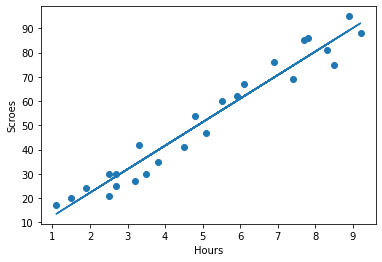

In [15]:
line = reg.coef_ * X + reg.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.xlabel("Hours")
plt.ylabel('Scroes')
plt.show()